# Analyse baseline model 

In this document we will create a baseline model that is the simplest solution for us.
This baseline model was created with a CNN network. The structure of the model can be found in [this](https://github.com/BB8-2020/EmpathicRobot/blob/baseline-model/baseline-model/baseline_model.py) file. 

In [1]:
# import the model python code 
import baseline_model as ml
import matplotlib.pyplot as plt
import tensorflow as tf

Lets us start with creating the model:

In [2]:
baseline_model = ml.create_model()

The model summary looks as here below:

### Build model 
__1. Conv Layer__

The first layer consists of 32 3x3 filters with ReLU. We set the input of this layer equal to the shape of the train data, which is (48, 48, 1).

We leave the stride and padding at the default value. In the next model we are going to play with this but for now we keep it at 1 and "vaild".

We do add a Batch normalization. The output of this layer (the activation map) is (46, 46, 32).

__2. Conv Layer__

The second layer consists of 64 filters of 3x3 and here we apply batch normalization and relu as well. The output of this layer woudld be (44, 44, 64). we also apply a max pooling of (2,2) that produces an output shape of (22, 22, 64).

To this layer we add a flatten option, that means the output shape of this layer would be (30976) 

__3. fully connected layer__

This layer takes (30976) as input. The output shape of this layer is the probability of 2 classes. 

In [3]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2 (Conv2D)               (None, 44, 44, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6

Looks good, time to compile!

## Model compile and train

To compile the model we use Adam optimaizer and categorical_crossentropy as los function. Let us now train the model. We start by reading the correct json dataset.

In [4]:
# parameter is the correct path to the json file.
train_frame = ml.read_data("train_happy_frame.json")

Now we create the trainsets and use these to compile and train our model.

In [5]:
# compile the model
ml.compile_model(model=baseline_model)

In [6]:
# the trainsets are created when calling the train function.
history = ml.train_model(model= baseline_model, frame= train_frame, batch_size= 64, epochs= 10, vs= 0.2, save= False)

Epoch 1/10
353/353 [==============================] - 49s 137ms/step - loss: 2.0717 - accuracy: 0.4133 - val_loss: 0.8821 - val_accuracy: 0.3114
Epoch 2/10
353/353 [==============================] - 47s 133ms/step - loss: 1.5227 - accuracy: 0.4576 - val_loss: 1.0061 - val_accuracy: 0.5908
Epoch 3/10
353/353 [==============================] - 47s 134ms/step - loss: 0.9891 - accuracy: 0.5809 - val_loss: 0.8567 - val_accuracy: 0.5881
Epoch 4/10
353/353 [==============================] - 47s 133ms/step - loss: 1.3785 - accuracy: 0.5072 - val_loss: 1.0573 - val_accuracy: 0.2696
Epoch 5/10
353/353 [==============================] - 47s 132ms/step - loss: 1.0687 - accuracy: 0.4468 - val_loss: 1.5852 - val_accuracy: 0.4703
Epoch 6/10
353/353 [==============================] - 47s 132ms/step - loss: 1.6091 - accuracy: 0.5268 - val_loss: 1.1052 - val_accuracy: 0.4804
Epoch 7/10
353/353 [==============================] - 48s 136ms/step - loss: 1.3726 - accuracy: 0.5099 - val_loss: 1.1308 - val_ac

Now we're going to test our model using the testfile for the baseline model.

In [7]:
# parameter is the correct path to the json file.
test_frame = ml.read_data("test_happy_frame.json")

In [8]:
loss, accuracy = ml.evaluate_model(model = baseline_model, frame= test_frame, batch_size=256)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

28/28 [==============================] - 3s 112ms/step - loss: 1.4174 - accuracy: 0.5878
Test loss: 1.4174
Test accuracy: 0.5878


## Results

Looking at the results we can say that our model isn't overfit. 

The accuracy from our training isn't to high or to low. Which is good since this model is a really simple one which only consists of 3 layers. It shouldn't have a high accuracy else it would have been overfitted. We are now going to compare our train and test results with the plot below.

In [9]:
#Deze functie mag je ergens anders platsen + docuemteren 
def plot_results(history):
    """Plot the results of the fit function of the model.
       takes history: A nummpy array as input."""
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

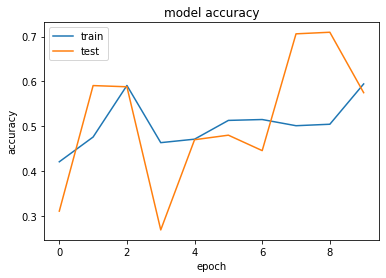

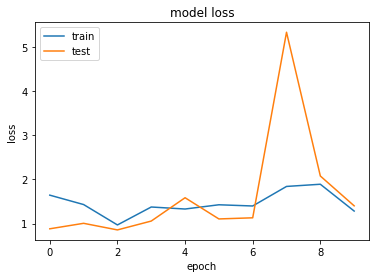

In [10]:
plot_results(history)

As you can see. The accuracy and loss of our test result are pretty similair to that of the train result (except for some points at the beginning). This proves that our model isn't overfitted, because if that was the case the train result would keep getting better as the test result would get worse at some point. Here the points keep close to each other. If one result improves the other one improves as well.

## Save Model

Now we need to save the model that we could use in the application. 

In [11]:
# Save modelas pb model
baseline_model.save('training/baseline')

INFO:tensorflow:Assets written to: training/baseline/assets


Now we can make a lite tenserflow model of the baseline. This model could be used in the application! 

In [12]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('training_1/my_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('baseline.tflite', 'wb') as f:
  f.write(tflite_model)

## Conclusion 

Given these results. We can see that a simpel model is almost enough to answer small questions like "is someone happy or not". Even tough our final model is of course more complicated than this one and it will need to check on more emotions than just happy. It can be used as an basis and example for the final model. Using these results we can compare them to the results of future models to see if our more complicated models are actually improving or not. Since that is one of our goals. To make an more complicated model that can recognize more emotions and scores better than the baseline model.